# Calculate whether fast dividers truly posses shortened cell cycle control:

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from tqdm import tqdm
from Server_Movies_Paths import Get_MDCK_Movies_Paths_Temporary


### Let's use the tree shorlisted cells as in 'single_cell_lineages' to demonstrate our intentions:

We are about to analyse all 'full paths' from the tree pool in MDCK dataset:

-> **Go from leaves (at final frame) all the way backwards to their respective roots (at initial frame)**: 

Have a look at various branches e.g. in tree #33, you would have exactly 29 full-duration paths from 29 leave cells to the same initial founder. Have a look at "single_cell_lineages/01_Plotting_Cell_Lineage_Trees.ipynb" notebook to familiarise yourself with the terminology & how we visualise cell lineage representations.


In [2]:
cells = [14, 36, 33]
cct = [[] for _ in range(len(cells))]

with h5py.File("../example_segment_classif_tracked_movie.hdf5", "r") as f:
    for enum, (cell, progeny) in enumerate(zip(f["tracks"]["obj_type_1"]["LBEPR"], 
                                               f["tracks"]["obj_type_1"]["Ch_Ch_Gen_CCT"])):
        if cell[4] in cells:
            idx = cells.index(cell[4])
            
            if progeny[0] != 0 and progeny[1] != 0:
                cct[idx].append(float(progeny[3]))
        

In [3]:
for cell, item in zip(cells, cct):
    print (f"Tree ID #{cell} contains {len(item)} non-root, non-leaf cells\n\tMean = {round(np.mean(item), 2)} ± St.Dev = {round(np.std(item), 2)}")
           

Tree ID #14 contains 3 non-root, non-leaf cells
	Mean = 20.6 ± St.Dev = 6.52
Tree ID #36 contains 14 non-root, non-leaf cells
	Mean = 16.93 ± St.Dev = 4.49
Tree ID #33 contains 29 non-root, non-leaf cells
	Mean = 14.01 ± St.Dev = 1.86


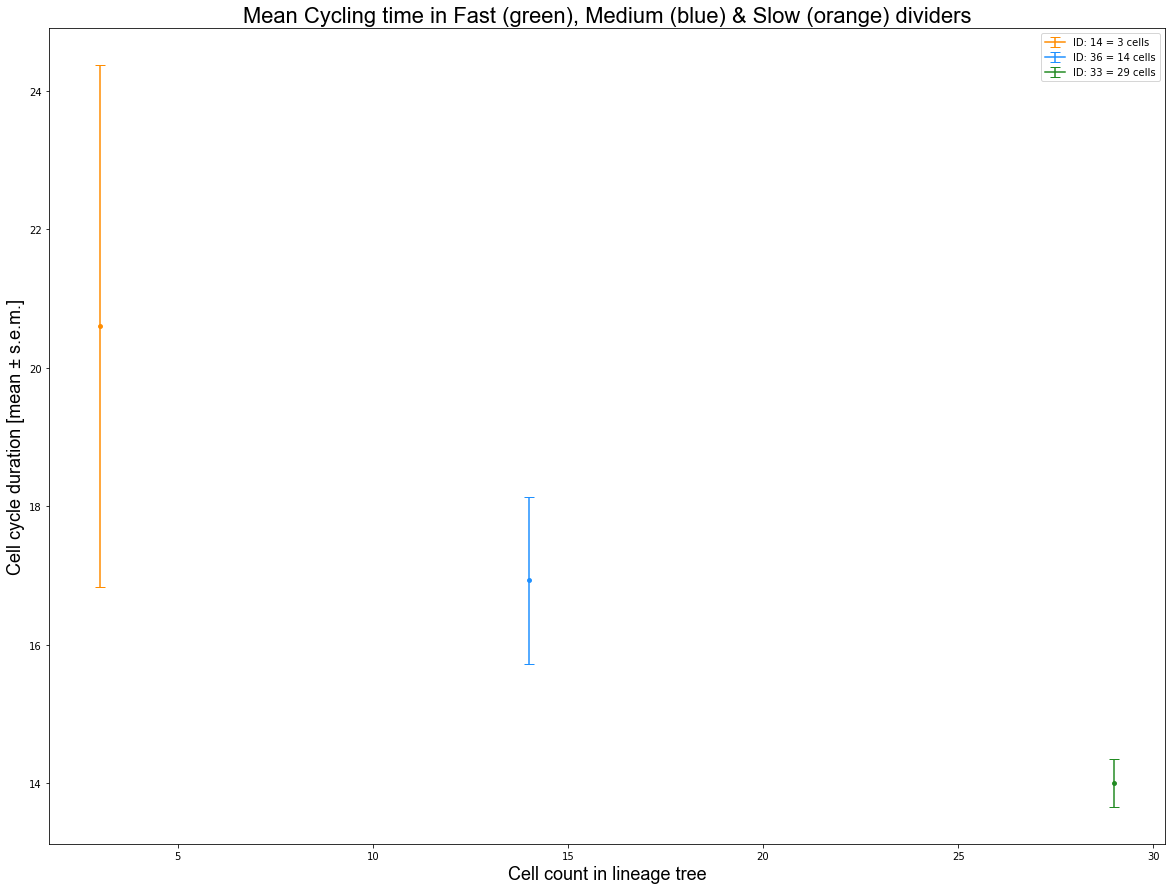

In [4]:
_ = plt.figure(figsize=(20, 15))

for cell, item, clr in zip(cells, cct, ["darkorange", "dodgerblue", "forestgreen"]):
    plt.errorbar(x=len(item), y=np.mean(item), yerr=np.std(item)/np.sqrt(len(item)), color=clr, capsize=5, label=f"ID: {cell} = {len(item)} cells")
    plt.scatter(x=len(item), y=np.mean(item), color=clr, s=15)

plt.title("Mean Cycling time in Fast (green), Medium (blue) & Slow (orange) dividers", fontname="Arial", fontsize=22)
plt.xlabel("Cell count in lineage tree", fontname="Arial", fontsize=18)
plt.ylabel("Cell cycle duration [mean ± s.e.m.]", fontname="Arial", fontsize=18)
plt.legend()
plt.show()

## Calculate whether cycle-length is heritable:

Take full paths tracked from the beginning to the end of movie. Here are some interesting thoughts of what such analysis may help you answer:

+ Calculate whether there is a link between cell cycle times?
+ What is the distribution of cell cycle durations based on the path length? 
+ How many generations can you follow this trend for?


In [5]:
movies = Get_MDCK_Movies_Paths_Temporary()
cellC = [[] for _ in range(len(movies))]
unique_IDs = [[] for _ in range(len(movies))]

for enum, movie in tqdm(enumerate(movies)):
    hdf5_file = movie + "HDF/segmented.hdf5"
    pos, date = movie.split("/")[-2], movie.split("/")[-3]
    
    with h5py.File(hdf5_file, "r") as f:
        movie_len = len(f["objects"]["obj_type_1"]["map"])
        ID_list = [item[0] for item in f["tracks"]["obj_type_1"]["LBEPR"]]
        leafs, roots = [], []

        for e, (cell, progeny) in enumerate(zip(f["tracks"]["obj_type_1"]["LBEPR"], 
                                                f["tracks"]["obj_type_1"]["Ch_Ch_Gen_CCT"])):
            
            if progeny[0] == 0 and progeny[1] == 0:
                if cell[2] == movie_len - 2:
                    if cell[3] != cell[4]:
                        leafs.append(cell[0])
                        roots.append(cell[4])

        for leaf in leafs:
            temporary = []
            
            leaf_index = ID_list.index(leaf)
            parent_ID = f["tracks"]["obj_type_1"]["LBEPR"][leaf_index][3]
            parent_index = ID_list.index(parent_ID)
            
            # Check if parent is valuable:
            while f["tracks"]["obj_type_1"]["LBEPR"][parent_index][4] != 0:
                #print (f["tracks"]["obj_type_1"]["LBEPR"][parent_index][0])
                temporary.append(f["tracks"]["obj_type_1"]["Ch_Ch_Gen_CCT"][parent_index][3])
                parent_index = ID_list.index(f["tracks"]["obj_type_1"]["LBEPR"][parent_index][3])
            
            # Now check whether your founder cell reaches to the very beginning of that movie:
            if f["tracks"]["obj_type_1"]["LBEPR"][parent_index][3] == 0:
                if f["tracks"]["obj_type_1"]["LBEPR"][parent_index][1] == 0:
                    cellC[enum].append(temporary)
                    
                    # Take a record of unique founder cell IDs (= trees) in your analysis:
                    unique_IDs[enum].append(f["tracks"]["obj_type_1"]["LBEPR"][parent_index][0])
                    

44it [02:30,  3.41s/it]


In [6]:
counter, counter_unique = 0, 0

for movie in unique_IDs:
    print (f"Total paths: {len(movie)} -> out of which unique root IDs: {len(set(movie))}")
    counter += len(movie)
    counter_unique += len(set(movie))

print (f"\nTotal Lineage Trees: {counter} -> out of which unique tree IDs: {counter_unique} = {round(counter_unique*100/counter, 2)}%")


Total paths: 34 -> out of which unique root IDs: 10
Total paths: 38 -> out of which unique root IDs: 19
Total paths: 42 -> out of which unique root IDs: 19
Total paths: 262 -> out of which unique root IDs: 54
Total paths: 280 -> out of which unique root IDs: 64
Total paths: 337 -> out of which unique root IDs: 70
Total paths: 286 -> out of which unique root IDs: 71
Total paths: 179 -> out of which unique root IDs: 34
Total paths: 310 -> out of which unique root IDs: 50
Total paths: 121 -> out of which unique root IDs: 38
Total paths: 141 -> out of which unique root IDs: 33
Total paths: 0 -> out of which unique root IDs: 0
Total paths: 76 -> out of which unique root IDs: 14
Total paths: 154 -> out of which unique root IDs: 46
Total paths: 50 -> out of which unique root IDs: 11
Total paths: 46 -> out of which unique root IDs: 5
Total paths: 13 -> out of which unique root IDs: 3
Total paths: 159 -> out of which unique root IDs: 34
Total paths: 269 -> out of which unique root IDs: 57
Total

### Sort data based on progeny size:

The paths you want to analyse have different lengths, including 1 (slowest), 2, 3, 4, 5, 6, and 7 intermediate cells: 

In [7]:
hist_data = [[[] for _ in range(e+1)] for e, _ in enumerate(range(7))]

for movie in cellC:
    for path in movie: 
        # Exclude paths which only have 'root - leaf' or 'root - cell - leaf' trajectories:
        if len(path) > 0:
            for e, item in enumerate(path[::-1]):
                hist_data[len(path)-1][e].append(item)


### Plot the histograms of divider subpopulations with ranging cycling speeds

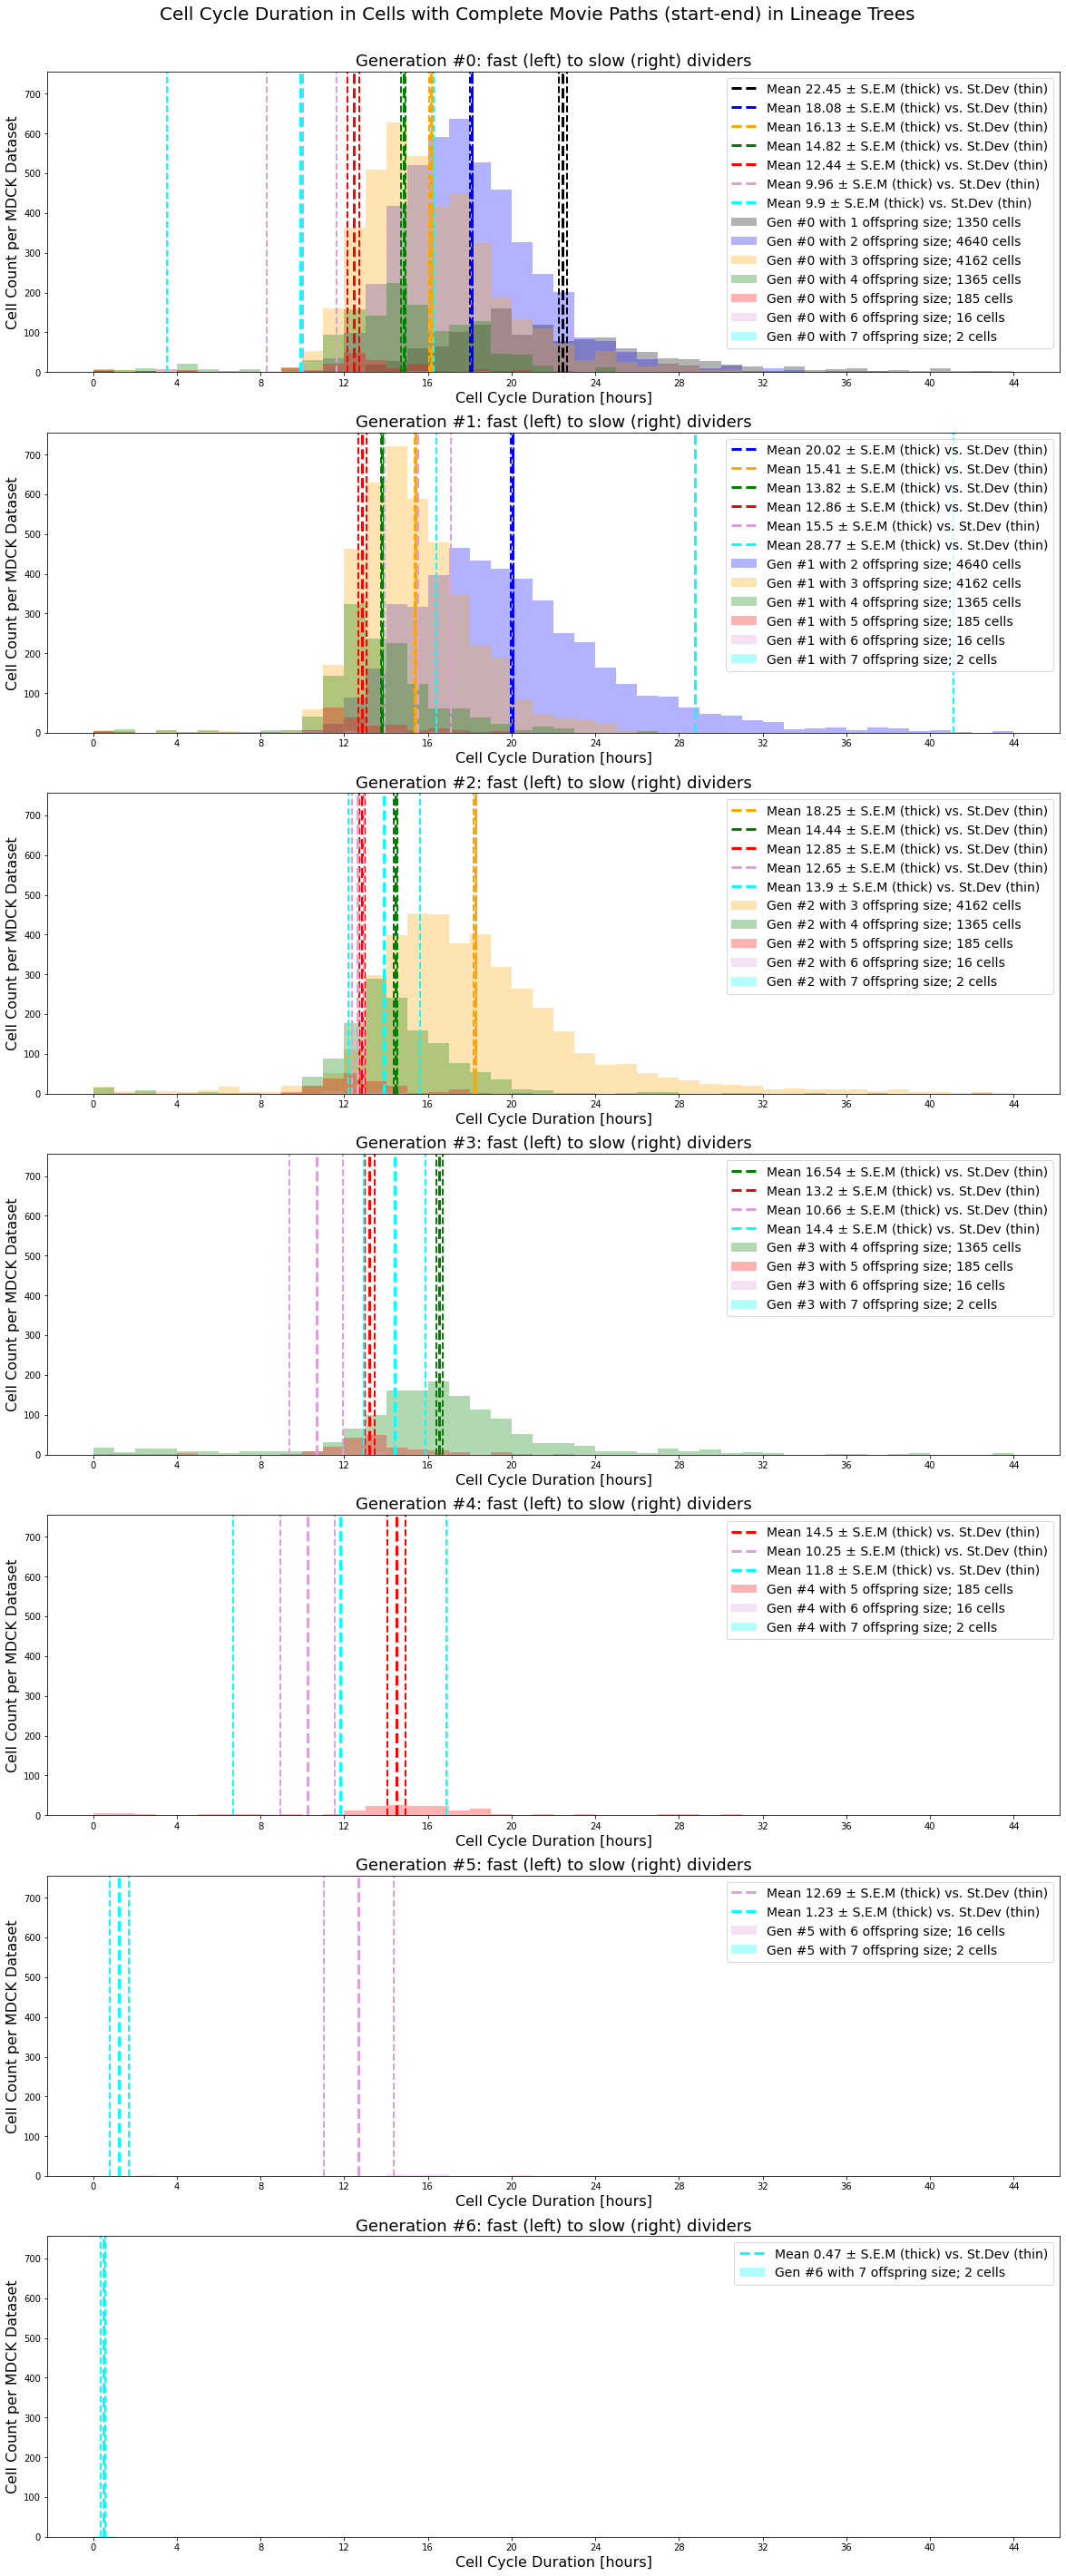

In [8]:
fig, axs = plt.subplots(nrows=len(hist_data), ncols=1, sharey=True, figsize=(20, 50))
fig.suptitle(t="Cell Cycle Duration in Cells with Complete Movie Paths (start-end) in Lineage Trees", x=0.5, y=0.9, fontsize=20)
colours = ["black", "blue", "orange", "green", "red", "plum", "cyan"]

for enum, path in enumerate(hist_data):
    
    for index in range(len(path)):
    
        axs[index].hist(path[index], bins=44, range=(0, 44), alpha=0.3, color=colours[enum], label=f"Gen #{index} with {enum+1} offspring size; {len(path[index])} cells")
        axs[index].axvline(x=np.mean(path[index]), color=colours[enum], linestyle="dashed", linewidth=3, label=f"Mean {round(np.mean(path[index]), 2)} ± S.E.M (thick) vs. St.Dev (thin)")
        axs[index].axvline(x=np.mean(path[index])-(np.std(path[index])/np.sqrt(len(path[index]))), color=colours[enum], linestyle="dashed", linewidth=2)
        axs[index].axvline(x=np.mean(path[index])+(np.std(path[index])/np.sqrt(len(path[index]))), color=colours[enum], linestyle="dashed", linewidth=2)
        
        axs[index].set_title(f"Generation #{index}: fast (left) to slow (right) dividers", fontsize=18)
        axs[index].set_ylabel("Cell Count per MDCK Dataset", fontsize=16)
        axs[index].set_xlabel("Cell Cycle Duration [hours]", fontsize=16)
        axs[index].set_xticks(list(range(0, 45, 4)))
        axs[index].legend(loc="upper right", fontsize=14)

plt.show()


### Plot the final results - generational means ± s.e.m & drifts!

Gen #1 mean = 22.45 -> whole movie duration estimate = 67
Gen #1 mean = 18.08 -> whole movie duration estimate = 72
Gen #1 mean = 16.13 -> whole movie duration estimate = 81
Gen #1 mean = 14.82 -> whole movie duration estimate = 89
Gen #1 mean = 12.44 -> whole movie duration estimate = 87


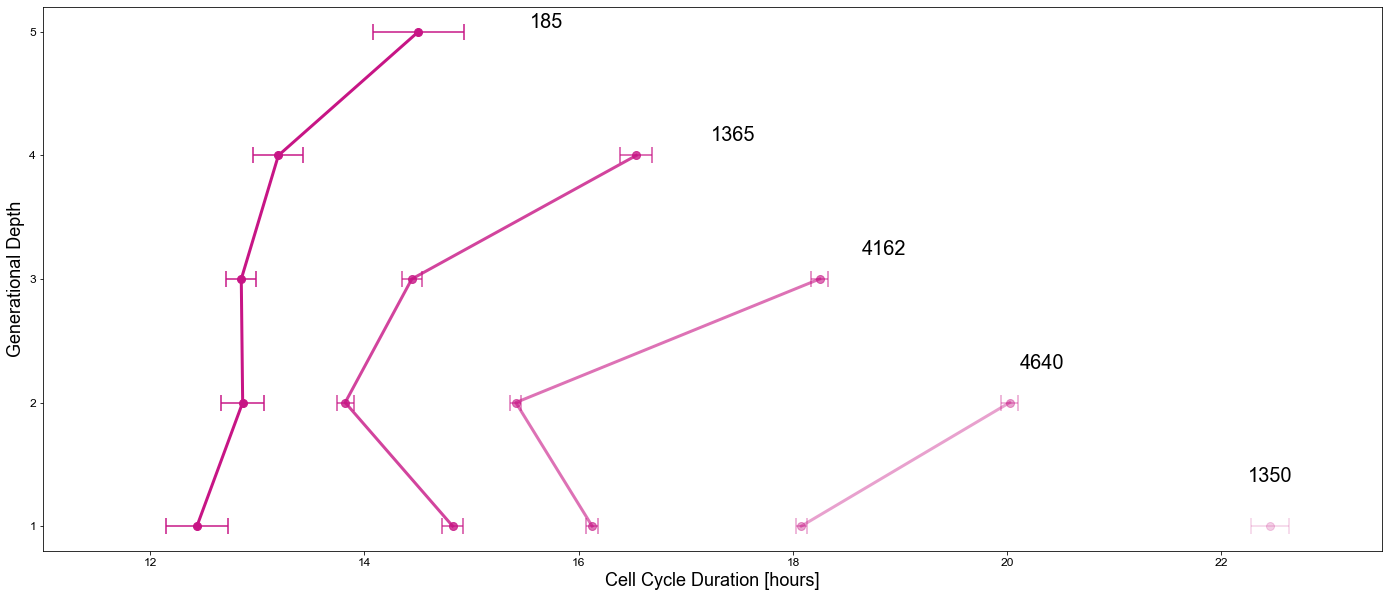

In [9]:
_ = plt.subplots(figsize=(24, 10))
mean_data = [[[] for _ in range(e+1)] for e, _ in enumerate(range(7))]

for enum, path in enumerate(hist_data[:-2]):
    
    for index in range(len(path)):
        
        mean = np.mean(path[index])
        sem = np.std(path[index]) / np.sqrt(len(path[index]))
        
        mean_data[len(path)-1][index].append([mean, sem])
        
        if index == 0:
            print ("Gen #1 mean = {} -> whole movie duration estimate = {}".format(round(mean, 2), round(mean * (enum + 3))))
            
        plt.errorbar(x=mean, y=index+1, xerr=sem, color="mediumvioletred", alpha=(enum+1)*0.2,
                     ecolor="mediumvioletred", elinewidth=1.5, capsize=8, capthick=1.5)
        plt.xlabel("Cell Cycle Duration [hours]", fontname="Arial", fontsize=18)
        plt.ylabel("Generational Depth", fontname="Arial", fontsize=18)
        plt.yticks(list(range(1, len(hist_data[:-2]) + 1)), fontname="Arial", fontsize=12)
        plt.xticks(fontname="Arial", fontsize=12)
        plt.xlim(11, 23.5)

        if index == len(path) - 1:
            plt.text(x=mean+enum*0.3, y=index+1 + 0.4 - enum*0.08, s=str(len(path[index])), 
                     fontname="Arial", fontsize=20, horizontalalignment='center', verticalalignment='center')
            
for eee, offspring_len in enumerate(mean_data[:-2]):
    plt.plot([item[0][0] for item in offspring_len], range(1, len([item[0][0] for item in offspring_len]) + 1), 
             marker='o', markersize=8, color="mediumvioletred", alpha=(eee+1)*0.2, linewidth=3.0, linestyle="solid", label=eee + 1)
    
mpl.rcParams['axes.spines.bottom'] = True
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

plt.show()


### Done!